In [89]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [103]:
path = "logs/training_logs.json"
with open(r'logs/training_logs.json') as json_file:
    json_data = json.load(json_file)
    print(json_data.keys())

    for date, values in json_data.items():
        print(date)
        print(values.keys())

dict_keys(['17.11.22 19:12:57', '24.11.22 20:22:23', '25.11.22 12:48:43', '30.11.22 19:48:47', '30.11.22 23:05:02', '01.12.22 02:19:44', '03.12.22 17:53:26', '03.12.22 22:02:50', '04.12.22 13:02:28', '04.12.22 17:17:21', '05.12.22 00:44:42', '05.12.22 19:06:35', '06.12.22 11:30:35', '07.12.22 01:19:34', '07.12.22 12:00:52', '08.12.22 01:52:30', '15.12.22 17:18:55', '15.12.22 17:23:21', '15.12.22 17:27:47', '15.12.22 17:32:06', '16.12.22 00:06:23', '16.12.22 00:10:38', '16.12.22 00:32:00', '16.12.22 00:40:58', '16.12.22 00:45:42', '16.12.22 00:57:53', '16.12.22 01:09:56', '16.12.22 07:22:10', '16.12.22 13:31:00', '16.12.22 19:39:08', '20.12.22 00:05:11', '20.12.22 06:14:43', '20.12.22 12:22:15', '20.12.22 18:32:02', '21.12.22 20:08:45', '22.12.22 05:58:24', '22.12.22 14:21:21', '23.12.22 00:21:14', '23.12.22 10:15:18', '23.12.22 20:05:10', '24.12.22 05:54:10', '24.12.22 15:50:26', '24.12.22 15:57:49', '24.12.22 16:05:13', '25.12.22 02:06:02', '25.12.22 02:13:35', '25.12.22 02:21:08', '2

## Collecting good data

In [104]:
valid_data = {"ResNet50_scratch_cifar": "30.11.22 19:48:47",
              "ResNet50_pt_cifar": "30.11.22 23:05:02"}




valid_data = {"ResNet101_pt_HAM": "08.01.23 14:22:08",
              "ResNet101_pt_HAM2": "09.01.23 02:21:22",
              "ResNet101_s_HAM": "08.01.23 20:30:44",
              "ResNet101_pt_CIFAR": "09.01.23 10:36:29",
              "ResNet101_s_CIFAR": "09.01.23 03:37:09",
              "ResNet101_pt_CIFAR_LN": "09.01.23 11:25:44",
              "ResNet101_s_CIFAR_LN": "09.01.23 04:05:23",
              "ResNet101_pt_CIFAR_IM": "09.01.23 10:45:21",
              "ResNet101_s_CIFAR_IM": "09.01.23 06:29:58",
              "ResNet50_pt_HAM": "09.01.23 09:18:09",
              "ResNet50_s_HAM": "09.01.23 08:18:00",
              "ResNet50_pt_CIFAR": "08.01.23 20:51:27",
              "ResNet50_s_CIFAR": "08.01.23 14:22:00",
              "ResNet50_pt_CIFAR_LN": "08.01.23 21:05:52",
              "ResNet50_s_CIFAR_LN": "08.01.23 14:21:55",
              "ResNet50_pt_CFIAT_IM": "09.01.23 03:05:43",
              "ResNet50_s_CIFAR_IM": "08.01.23 23:04:57"}



cifar_data = {"ResNet101_pt_CIFAR": "09.01.23 10:36:29",
              "ResNet101_s_CIFAR": "09.01.23 03:37:09",
              "ResNet50_pt_CIFAR": "08.01.23 20:51:27",
              "ResNet50_s_CIFAR": "08.01.23 14:22:00"}


cifar_ln = {"ResNet101_pt_CIFAR_LN": "09.01.23 11:25:44",
            "ResNet101_s_CIFAR_LN": "09.01.23 04:05:23",
            "ResNet50_pt_CIFAR_LN": "08.01.23 21:05:52",
            "ResNet50_s_CIFAR_LN": "08.01.23 14:21:55"}

cifar_im = {"ResNet101_pt_CIFAR_IM": "09.01.23 10:45:21",
            "ResNet101_s_CIFAR_IM": "09.01.23 06:29:58",
            "ResNet50_pt_CFIAT_IM": "09.01.23 03:05:43",
            "ResNet50_s_CIFAR_IM": "08.01.23 23:04:57"}

ham = {"ResNet101_pt_HAM": "08.01.23 14:22:08",
       "ResNet101_pt_HAM2": "09.01.23 02:21:22",
       "ResNet101_s_HAM": "08.01.23 20:30:44",
       "ResNet50_pt_HAM": "09.01.23 09:18:09",
       "ResNet50_s_HAM": "09.01.23 08:18:00"}

In [105]:

def extract_data(data_dict, valid_data, best=False):

    all_title = []
    all_models = []
    all_datasets = []
    all_training_loss = []
    all_training_accuracy = []
    all_testing_loss = []
    all_testing_accuracy = []
    all_balanced_accuracy = []
    all_ece = []
    all_nll = []
    all_brier = []
    all_auroc = []
    all_best_configs = []


    # Just collect all relevant data
    for title, entry in valid_data.items():
        data_dict = json_data[entry]


        json_title = data_dict["title"]
        model = data_dict["model"]
        dataset = data_dict["dataset"]

        training_loss = data_dict["history"]["training_loss"]
        training_accuracy = data_dict["history"]["training_accuracy"]

        testing_loss = data_dict["history"]["testing_loss"]
        testing_accuracy = data_dict["history"]["testing_accuracy"]
        balanced_accuracy = data_dict["history"]["balanced_accuracy"]

        ece = data_dict["history"]["ece"]
        nll = data_dict["history"]["nll"]
        brier = data_dict["history"]["brier"]
        auroc = data_dict["history"]["auroc"]

        best_config = data_dict["best_config"]

        epoch_array = np.arange(len(ece))


        # Append them to a collective list
        all_title.append(json_title)
        all_models.append(model)
        all_datasets.append(dataset)
        all_training_loss.append([training_loss, epoch_array])
        all_training_accuracy.append([training_accuracy, epoch_array])
        all_testing_loss.append([testing_loss, epoch_array])
        all_testing_accuracy.append([testing_accuracy, epoch_array])
        all_balanced_accuracy.append([balanced_accuracy, epoch_array])
        all_ece.append([ece, epoch_array])
        all_nll.append([nll, epoch_array])
        all_brier.append([brier, epoch_array])
        all_auroc.append([auroc, epoch_array])
        all_best_configs.append(best_config)






    # Color hues for plotting:
    pretrained_hues = ["rosybrown", "indianred", "brown", "firebrick", "maroon", "darkred", "salmon", "tomato", "darksalmon",
                       "coral", "orangered", "rosybrown", "indianred", "brown", "firebrick", "maroon", "darkred", "salmon", 
                       "tomato", "darksalmon", "coral", "orangered"]
    scratch_hues = ["forestgreen", "limegreen", "darkgreen", "lime", "green", "seagreen", "mediumseagreen", "springgreen", 
                    "mediumspringgreen", "aquamarine", "lightgreen","forestgreen", "limegreen", "darkgreen", "lime", "green", 
                    "seagreen", "mediumseagreen", "springgreen", "mediumspringgreen", "aquamarine", "lightgreen"]

    plt.rcParams["figure.figsize"] = (20,10)


    """ For plotting loss and accuracy """
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.title.set_text('Training loss')
    ax2.title.set_text('Testing loss')
    ax3.title.set_text('Testing accuracy')
    ax4.title.set_text('Balanced accuracy')

    ### Training loss
    for i, experiment in enumerate(all_training_loss):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = best_epoch if best else last_epoch

        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax1.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        this_loss = experiment[0][plotting_epoch]
        ax1.plot(plotting_epoch, this_loss, 'ro')

    ### Testing loss
    for i, experiment in enumerate(all_testing_loss):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = best_epoch if best else last_epoch


        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax2.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        this_loss = experiment[0][plotting_epoch]
        ax2.plot(plotting_epoch, this_loss, 'ro')
    
    ### Testing acc
    for i, experiment in enumerate(all_testing_accuracy):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = best_epoch if best else last_epoch


        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax3.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        this_testing_acc = experiment[0][plotting_epoch] #all_best_configs[i]["this_test_accuracy"]
        ax3.annotate(this_testing_acc,xy=(plotting_epoch, this_testing_acc), xycoords='data')
        ax3.plot(plotting_epoch, this_testing_acc, 'ro')


    ### Balanced acc
    for i, experiment in enumerate(all_balanced_accuracy):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = best_epoch if best else last_epoch


        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax4.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        this_testing_acc = experiment[0][plotting_epoch] #all_best_configs[i]["this_test_accuracy"]
        ax4.annotate(this_testing_acc,xy=(plotting_epoch, this_testing_acc), xycoords='data')
        ax4.plot(plotting_epoch, this_testing_acc, 'ro')

    ax4.legend()
    plt.show()


    """ For plotting Errors """
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.title.set_text('ECE')
    ax2.title.set_text('NLL')
    ax3.title.set_text('Brier')
    ax4.title.set_text('AUROC')

    ### ECE
    for i, experiment in enumerate(all_ece):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = best_epoch if best else last_epoch


        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax1.plot(experiment[1],experiment[0],label = all_title[i], color=color)


        # Mark best epoch
        best_epoch = all_best_configs[i]["this_epoch"]
        this_ece = experiment[0][plotting_epoch]# all_best_configs[i]["this_ece"]
        ax1.annotate(this_ece,xy=(plotting_epoch, this_ece), xycoords='data')
        ax1.plot(plotting_epoch, this_ece, 'ro')

    ### NLL
    for i, experiment in enumerate(all_nll):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = plotting_epoch if best else last_epoch


        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax2.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        this_nll =  experiment[0][plotting_epoch] # all_best_configs[i]["this_nll"]
        ax2.annotate(this_nll,xy=(plotting_epoch, this_nll), xycoords='data')
        ax2.plot(plotting_epoch, this_nll, 'ro')
    
    ### BRIER
    for i, experiment in enumerate(all_brier):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = best_epoch if best else last_epoch


        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax3.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        this_brier = experiment[0][plotting_epoch] # all_best_configs[i]["this_brier"]
        ax3.annotate(this_brier,xy=(plotting_epoch, this_brier), xycoords='data')
        ax3.plot(plotting_epoch, this_brier, 'ro')

    ### AUROC
    for i, experiment in enumerate(all_auroc):

        # Decide which epoch to plot (either the best performing or the last one)
        best_epoch = all_best_configs[i]["this_epoch"]
        last_epoch = len(all_balanced_accuracy[i][0])-1
        plotting_epoch = best_epoch if best else last_epoch


        color = pretrained_hues[i] if "pretrained" in all_title[i] else scratch_hues[i]
        ax4.plot(experiment[1],experiment[0], label = all_title[i], color=color)

        # Mark best epoch
        this_auroc =  experiment[0][plotting_epoch] # all_best_configs[i]["this_auroc"]
        ax4.annotate(this_auroc,xy=(plotting_epoch, this_auroc), xycoords='data')
        ax4.plot(plotting_epoch, this_auroc, 'ro')

    ax4.legend()
    plt.show()


    





In [ ]:
extract_data(json_data, valid_data)



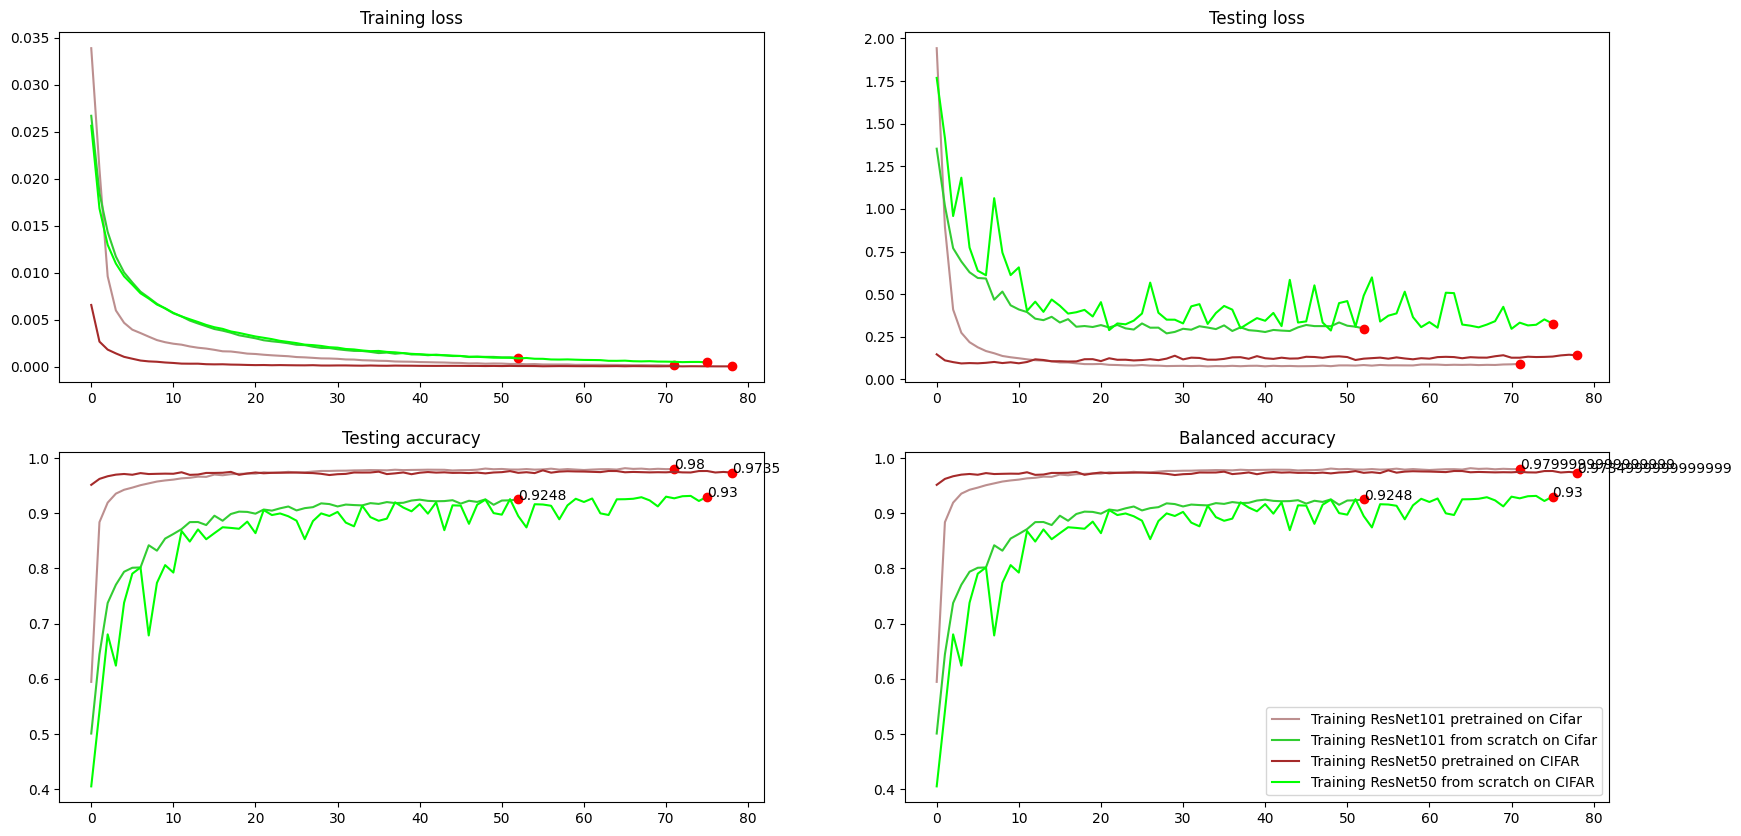

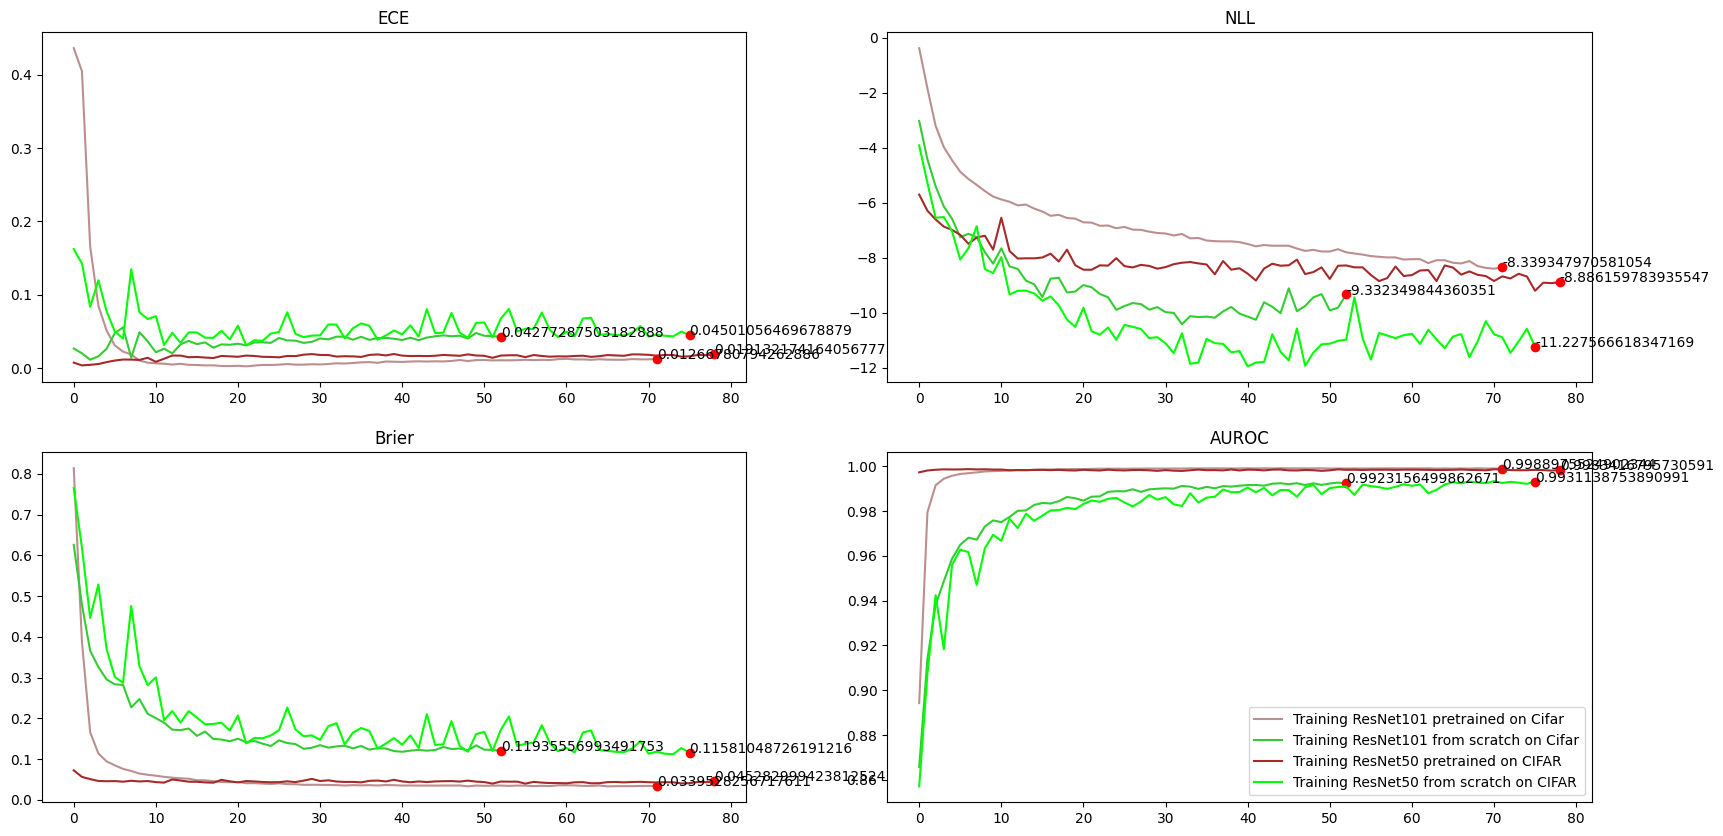

In [107]:
extract_data(json_data, cifar_data)

In [ ]:
extract_data(json_data, cifar_ln)

In [ ]:
extract_data(json_data, cifar_im)

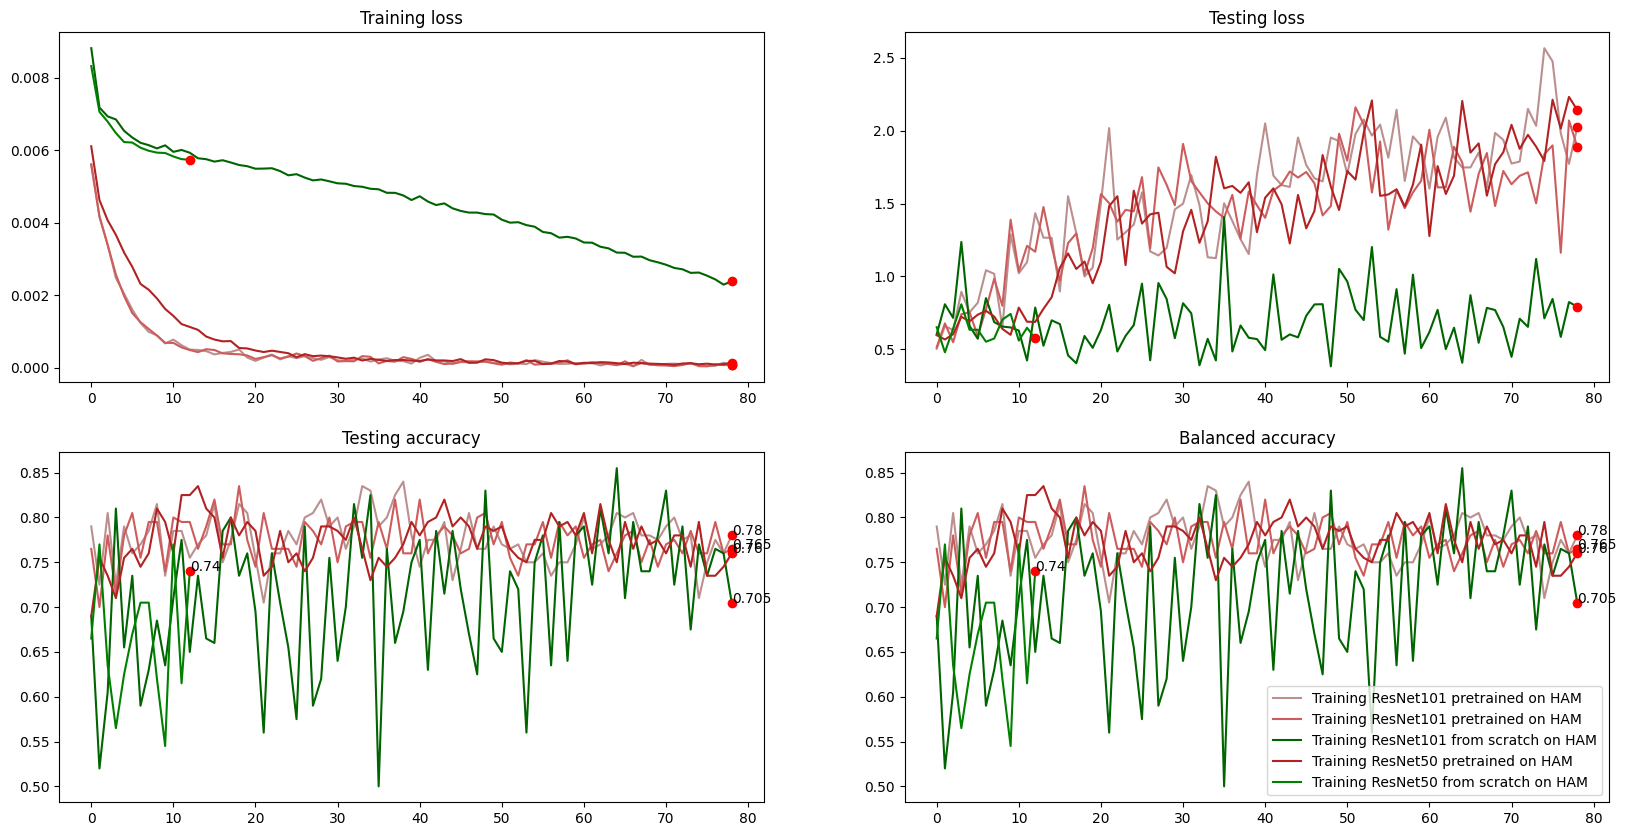

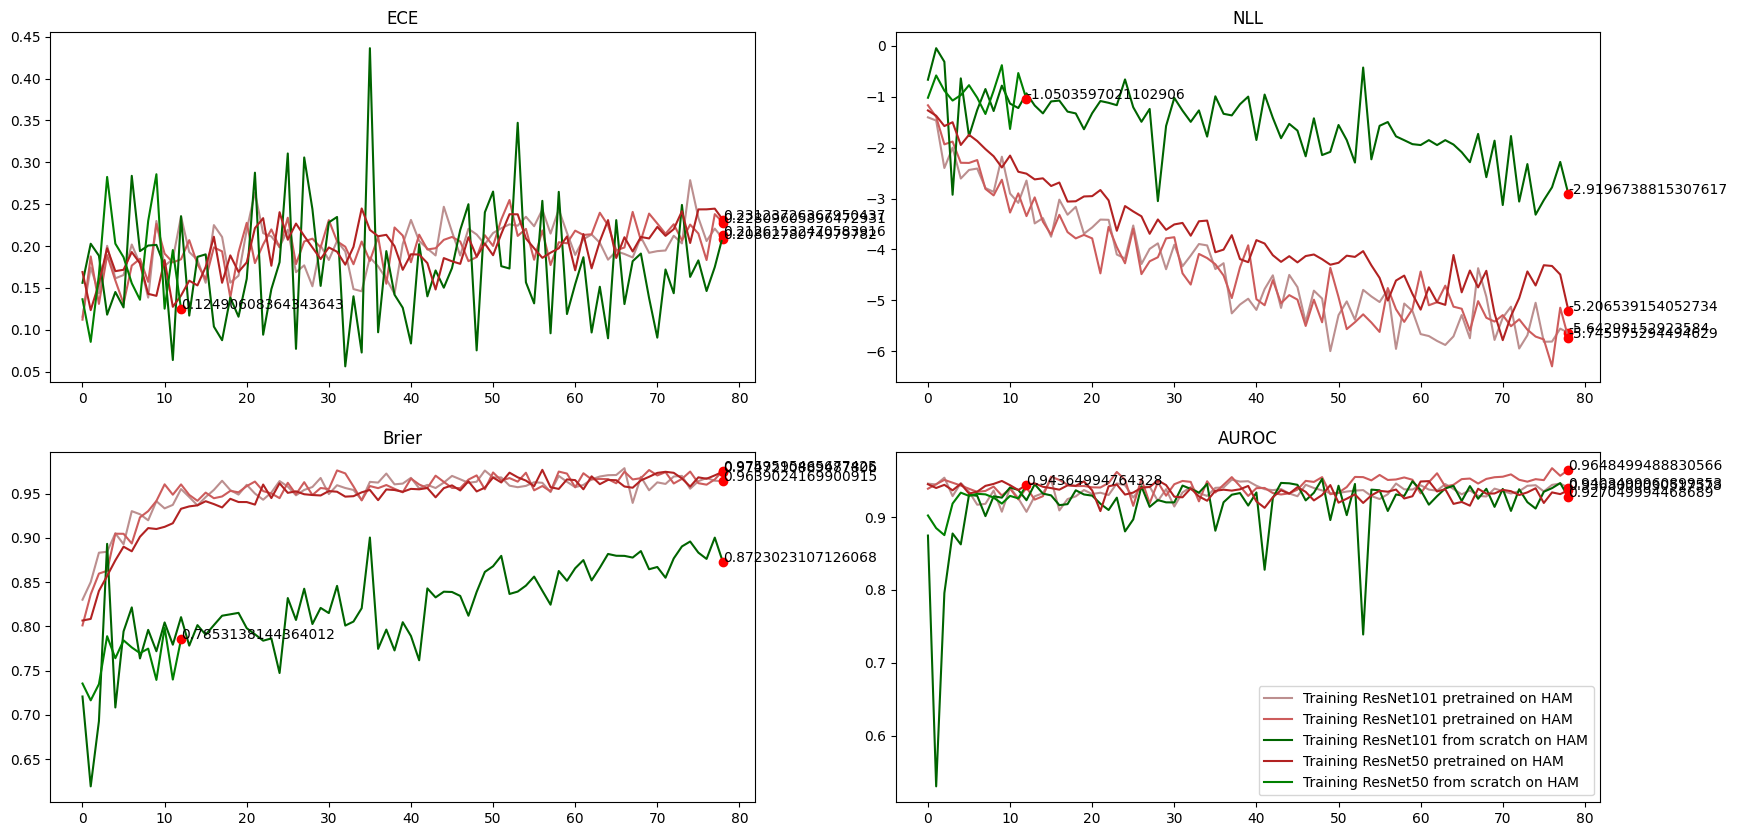

In [106]:
extract_data(json_data, ham)

['02.01.23 18:42:30', '03.01.23 01:29:06', '03.01.23 08:15:02', '03.01.23 15:02:23', '03.01.23 21:47:59', '04.01.23 04:31:43', '04.01.23 04:36:48', '04.01.23 04:41:52', '04.01.23 11:27:09', '04.01.23 11:32:14', '04.01.23 11:37:19', '04.01.23 18:23:57', '05.01.23 01:10:11', '05.01.23 01:15:17', '05.01.23 01:40:41', '05.01.23 01:45:46', '05.01.23 08:32:25', '05.01.23 09:28:15', '05.01.23 16:13:40', '05.01.23 17:09:22', '05.01.23 22:07:24', '05.01.23 22:12:27', '05.01.23 23:08:06', '06.01.23 05:41:18', '06.01.23 05:46:11', '06.01.23 05:51:04', '06.01.23 05:55:58', '06.01.23 07:43:30', '06.01.23 07:48:25', '06.01.23 14:19:35', '06.01.23 14:24:28', '06.01.23 14:48:55', '06.01.23 15:42:44', '06.01.23 15:47:39', '06.01.23 16:12:05', '06.01.23 16:36:33', '06.01.23 16:41:27', '06.01.23 16:46:21', '06.01.23 17:00:59', '06.01.23 17:54:51', '06.01.23 18:48:40', '07.01.23 01:19:01', '07.01.23 01:33:42', '07.01.23 01:38:35', '07.01.23 04:14:40', '07.01.23 05:57:11', '07.01.23 06:11:50', '07.01.23 06

In [97]:
def find_best(optim_data, trials):

    all_title = []
    all_models = []
    all_datasets = []
    all_training_loss = []
    all_training_accuracy = []
    all_testing_loss = []
    all_testing_accuracy = []
    all_balanced_accuracy = []
    all_ece = []
    all_nll = []
    all_brier = []
    all_auroc = []
    all_best_configs = []


    # Just collect all relevant data
    for entry in trials:
        data_dict = optim_data[entry]


        json_title = data_dict["title"]
        model = data_dict["model"]
        dataset = data_dict["dataset"]

        training_loss = data_dict["history"]["training_loss"]
        training_accuracy = data_dict["history"]["training_accuracy"]

        testing_loss = data_dict["history"]["testing_loss"]
        testing_accuracy = data_dict["history"]["testing_accuracy"]
        balanced_accuracy = data_dict["history"]["balanced_accuracy"]

        ece = data_dict["history"]["ece"]
        nll = data_dict["history"]["nll"]
        brier = data_dict["history"]["brier"]
        auroc = data_dict["history"]["auroc"]

        best_config = data_dict["best_config"]

        epoch_array = np.arange(len(ece))


        # Append them to a collective list
        all_title.append(json_title)
        all_models.append(model)
        all_datasets.append(dataset)
        all_training_loss.append([training_loss, epoch_array])
        all_training_accuracy.append([training_accuracy, epoch_array])
        all_testing_loss.append([testing_loss, epoch_array])
        all_testing_accuracy.append([testing_accuracy, epoch_array])
        all_balanced_accuracy.append([balanced_accuracy, epoch_array])
        all_ece.append([ece, epoch_array])
        all_nll.append([nll, epoch_array])
        all_brier.append([brier, epoch_array])
        all_auroc.append([auroc, epoch_array])
        all_best_configs.append(best_config)
    
    #print(all_title)


    # We want to find the best of the balanced accuracy
    all_balanced_accuracies = []
    amount_epochs = []
    for counter, experiment in enumerate(all_balanced_accuracy):
        this_balanced_data = experiment[0]
        last_value = this_balanced_data[-1]
        all_balanced_accuracies.append(last_value)
        amount_epochs.append(len(this_balanced_data))
   
    max_value = max(all_balanced_accuracies)
    max_index = all_balanced_accuracies.index(max_value)

    print(all_models[max_index])
    print(all_datasets[max_index])
    print(all_title[max_index])
    print("Balanced Accuracy: ", max_value, "at Epoch", amount_epochs[max_index])
    print("Best Config:")
    pprint(all_best_configs[max_index])
    print()
    



In [98]:

paths = ["logs/backups/optim_backups/optimize on cifar/optim_resnet50_False_ham.json", 
         "logs/backups/optim_backups/optimize on cifar/optim_resnet50_True_ham.json",
         "logs/backups/optim_backups/optimize on cifar/optim_resnet101_False_ham.json",
         "logs/backups/optim_backups/optimize on cifar/optim_resnet101_True_ham.json"]


for path in paths:

    with open(path) as json_file:
        optim_data = json.load(json_file)
    trials = list(optim_data.keys())

    find_best(optim_data, trials)

resnet50
ham
trial 11: RMSprop 0.00012726285389791345 Cosine
Balanced Accuracy:  0.8244253714954981 at Epoch 80
Best Config:
{'this_auroc': 0.9277816414833069,
 'this_balanced_test_accuracy': 0.8299108776809897,
 'this_brier': 0.9067874729920098,
 'this_calib_error': 0.09322656569545948,
 'this_ece': 0.06543145781107704,
 'this_epoch': 69,
 'this_nll': -3.5918955493962312,
 'this_sensitivty': 0.7460526315789474,
 'this_specificity': 0.913769123783032,
 'this_test_accuracy': 0.8700719917723688,
 'this_top_calib_error': 0.06543176768575583,
 'this_train_accuracy': 0.9561042524005486}

resnet50
ham
trial 11: RMSprop 3.3971212678889315e-05 Cycle
Balanced Accuracy:  0.9237110509235537 at Epoch 80
Best Config:
{'this_auroc': 0.9715689420700073,
 'this_balanced_test_accuracy': 0.9237110509235537,
 'this_brier': 0.9768416262064744,
 'this_calib_error': 0.06581761414950046,
 'this_ece': 0.04452495473600799,
 'this_epoch': 79,
 'this_nll': -6.614323291216233,
 'this_sensitivty': 0.87894736842105